Training Data

Possible Discount Categories:
['No discount' 'High discount' 'Low discount']

Months in dataset:
[11  6 10  4 12  5  8  7  9  1  3  2]

Week Numbers in dataset:
<IntegerArray>
[45, 23, 41, 24, 15, 49, 47, 46, 20, 35, 28, 39,  2, 38, 42, 52, 36, 10, 43,
 25, 16, 48, 18, 22, 37, 17, 21, 14,  5, 44, 51,  9, 19, 53, 32, 12, 27, 31,
 50,  7,  1,  3, 26, 30, 34, 13, 11,  4, 29, 33, 40,  6,  8]
Length: 53, dtype: UInt32


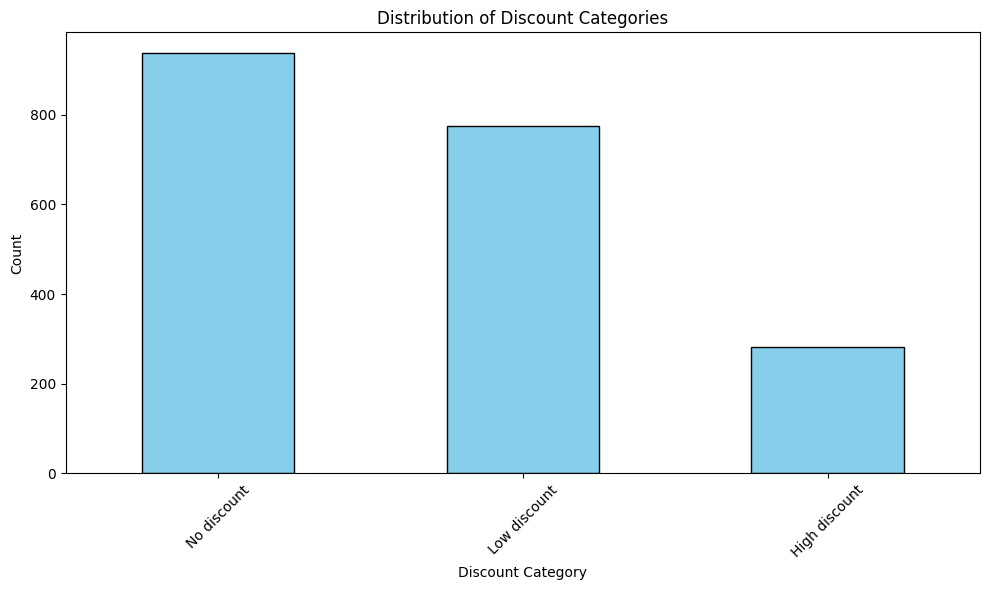

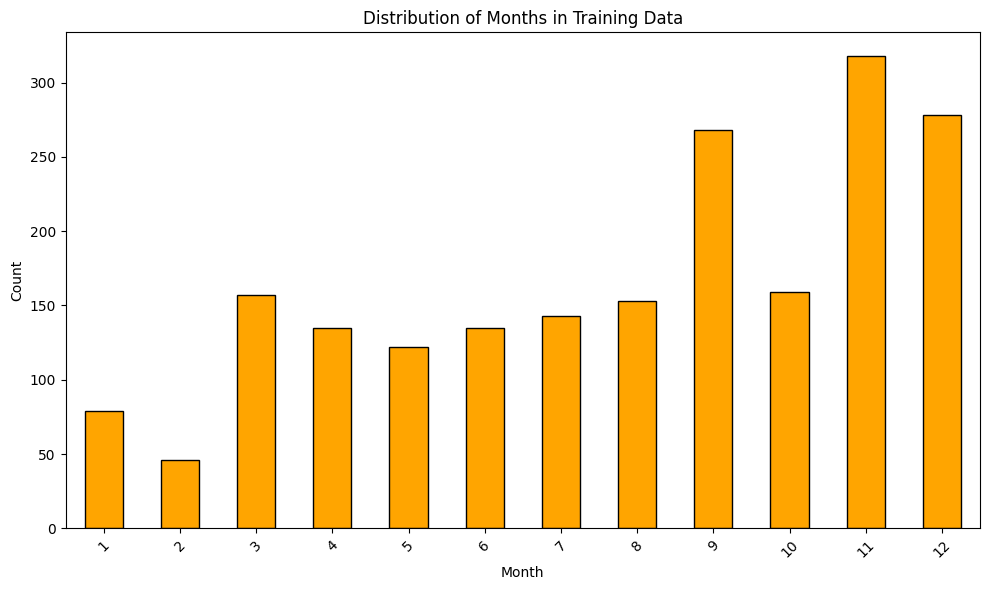

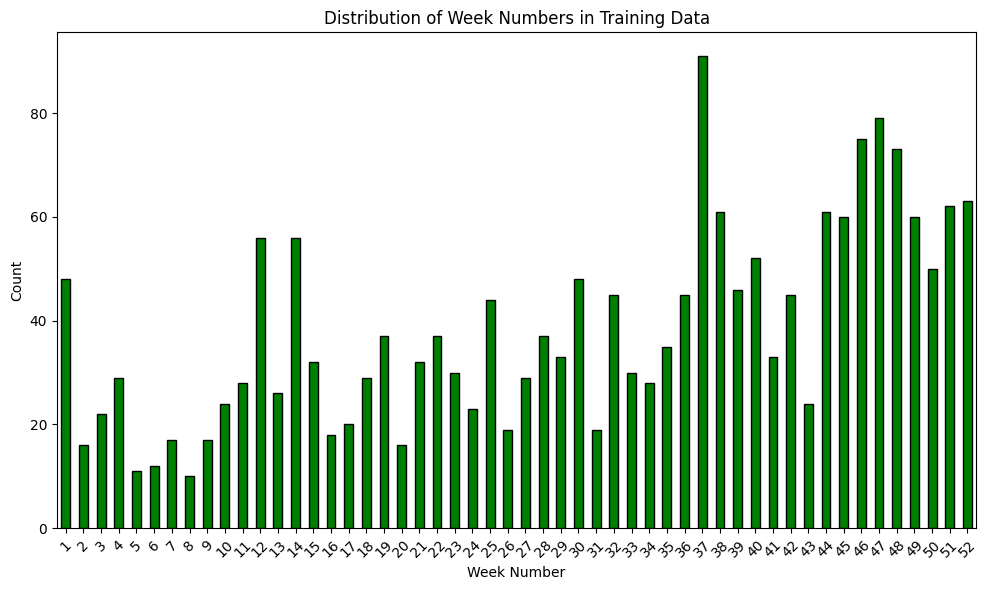

Training Data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount Category,Month,Week Number
5,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,No discount,6,24
6,7,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,No discount,6,24
7,8,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,Low discount,6,24
8,9,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,Low discount,6,24
9,10,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,No discount,6,24


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
file_path = r"C:\Users\Beheerder\Documents\DSAI master\Q5 Courses\Research Topics in Data mining\Sample - Superstore.csv"

# Load the CSV file into a pandas DataFrame with specified encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Categorize 'Discount' values into "No discount", "Low discount", and "High discount"
def categorize_discount(discount):
    if discount == 0:
        return "No discount"
    elif 0 < discount <= 0.2:  # Assuming 2% corresponds to 0.02 in the dataset
        return "Low discount"
    else:
        return "High discount"

# Apply the categorization function to the 'Discount' column
df['Discount Category'] = df['Discount'].apply(categorize_discount)

# Extract Month and Week Number from 'Order Date'
df['Month'] = df['Order Date'].dt.month  # Extract month as an integer (1 for January, 12 for December)
df['Week Number'] = df['Order Date'].dt.isocalendar().week  # Extract ISO week number

# Training dataset: all data with the same year, up to 31 December 2016 (the year doesn't matter, we select one)
train_year = df['Order Date'].dt.year.min()  # Select the first year available in the dataset
train_data = df[df['Order Date'].dt.year == train_year]

# Test dataset: all data with the order date after 31 December 2016
test_data = df[df['Order Date'] > '2016-12-31']

# Display the first few rows of the training dataset and the discount categories
print("Training Data")
train_data.head()

# Print all possible values of the 'Discount Category', 'Month', and 'Week Number' variables
print("\nPossible Discount Categories:")
print(df['Discount Category'].unique())
print("\nMonths in dataset:")
print(df['Month'].unique())
print("\nWeek Numbers in dataset:")
print(df['Week Number'].unique())

# Plot the distribution of discount categories in the training data
def plot_discount_category_distribution(df):
    value_counts = df['Discount Category'].value_counts()
    
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Discount Categories')
    plt.xlabel('Discount Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to plot the distribution of discount categories in the training data
plot_discount_category_distribution(train_data)

# Plot the distribution of months in the training data
def plot_month_distribution(df):
    value_counts = df['Month'].value_counts().sort_index()  # Sort by month index
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Distribution of Months in Training Data')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the distribution of week numbers in the training data
def plot_week_distribution(df):
    value_counts = df['Week Number'].value_counts().sort_index()  # Sort by week number
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='green', edgecolor='black')
    plt.title('Distribution of Week Numbers in Training Data')
    plt.xlabel('Week Number')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the functions to plot the distribution of months and week numbers in the training data
plot_month_distribution(train_data)
plot_week_distribution(train_data)


print("Training Data")
train_data.head()


C:\Users\Beheerder\AppData\Local\Temp\ipykernel_6028\250382869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Year-Week'] = train_data['Order Date'].dt.to_period('W')
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_6028\250382869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Year-Week'] = test_data['Order Date'].dt.to_period('W')


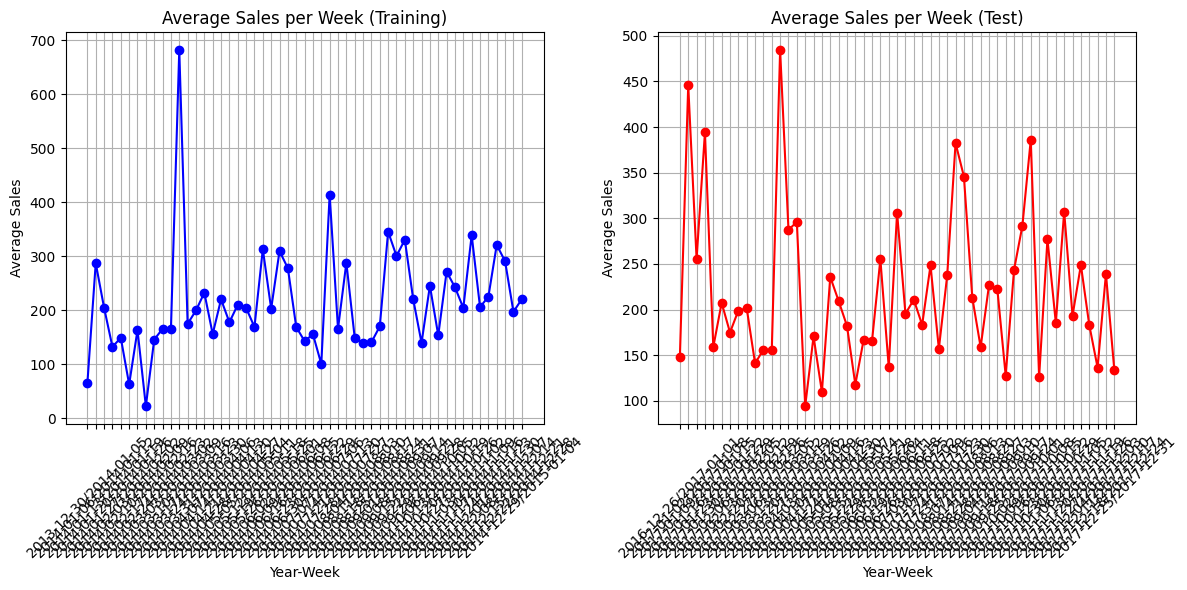

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the year-week format from 'Order Date' to group by week
train_data['Year-Week'] = train_data['Order Date'].dt.to_period('W')
test_data['Year-Week'] = test_data['Order Date'].dt.to_period('W')

# Group by 'Year-Week' and calculate the average sales per week for both datasets
avg_sales_per_week_train = train_data.groupby('Year-Week')['Sales'].mean()
avg_sales_per_week_test = test_data.groupby('Year-Week')['Sales'].mean()

# Plot the average sales per week for the training dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_sales_per_week_train.index.astype(str), avg_sales_per_week_train.values, marker='o', linestyle='-', color='b')
plt.title('Average Sales per Week (Training)')
plt.xlabel('Year-Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Plot the average sales per week for the test dataset
plt.subplot(1, 2, 2)
plt.plot(avg_sales_per_week_test.index.astype(str), avg_sales_per_week_test.values, marker='o', linestyle='-', color='r')
plt.title('Average Sales per Week (Test)')
plt.xlabel('Year-Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [53]:
import pandas as pd
import numpy as np
from itertools import product, combinations

# Define your quality measure functions
def entropy_quality(subgroup_size, total_size, rest_size):
    if subgroup_size == 0 or rest_size == 0:
        return 0  # Avoid NaN
    # Calculate entropy based on the formula given
    p_s = subgroup_size / total_size
    p_r = rest_size / total_size
    return -p_s * np.log(p_s) - p_r * np.log(p_r)

def distribution_difference(subgroup_data, rest_data, total_size):
    if rest_data == 0:
        return 0  # Avoid NaN
    # Use the third formula from your definition
    return (1 / total_size) * np.sum(np.abs((subgroup_data - rest_data) / rest_data))

def quality_measure(subgroup, df):
    # Total data size (unique people in the entire dataset)
    total_size = df['Customer ID'].nunique()
    
    # Subgroup size (unique people in the subgroup)
    subgroup_size = subgroup['Customer ID'].nunique()
    
    # Rest of the data size
    rest_size = total_size - subgroup_size
    
    # Use regular sales data for both subgroup and rest of the data
    sales_subgroup = subgroup['Sales'].mean()
    sales_rest = df.loc[~df.index.isin(subgroup.index), 'Sales'].mean()
    
    # Calculate entropy quality
    entropy = entropy_quality(subgroup_size, total_size, rest_size)
    
    # Calculate distribution difference in sales (without smoothing)
    distribution_diff = distribution_difference(sales_subgroup, sales_rest, total_size)
    
    # Total quality measure
    return entropy * distribution_diff

# Subgroup discovery based on combinations of attribute values
def discover_subgroups(df, attributes, k=5):
    best_subgroups = []
    
    # Iterate over all possible subsets of attributes (including empty subset)
    for subset_length in range(1, len(attributes) + 1):
        for subset in combinations(attributes, subset_length):
            # Generate all possible combinations of attribute values for this subset of attributes
            attribute_values = [df[attribute].unique() for attribute in subset]
            all_combinations = list(product(*attribute_values))
            
            # Iterate over all combinations of attribute values
            for combination in all_combinations:
                # Create a boolean mask to filter the dataframe for this subgroup
                mask = np.ones(len(df), dtype=bool)
                subgroup_description = {}
                
                for i, attribute in enumerate(subset):
                    mask = mask & (df[attribute] == combination[i])
                    subgroup_description[attribute] = combination[i]
                
                # Define the subgroup using the mask
                subgroup = df[mask]
                
                # Only consider subgroups with at least one unique customer
                if subgroup['Customer ID'].nunique() > 0:
                    # Calculate the quality measure for the subgroup
                    quality = quality_measure(subgroup, df)
                    
                    # Append the subgroup with its attributes, quality, and unique size (based on Customer ID)
                    best_subgroups.append({
                        "Attributes": subgroup_description,  # Combination of attribute values
                        "Quality": quality,
                        "Group Size (Unique Customers)": subgroup['Customer ID'].nunique()
                    })
    
    # Sort the subgroups by quality in descending order and return the top k
    best_subgroups = sorted(best_subgroups, key=lambda x: x['Quality'], reverse=True)[:k]
    
    return best_subgroups

# Example: Subgroup discovery based on 'Sub-Category', 'Segment', 'Region', and 'Ship Mode'
attributes = ['Sub-Category', 'Segment', 'Region', 'Ship Mode']  # Variables for subgroup discovery
best_subgroups_train = discover_subgroups(train_data, attributes, k=200)

# Convert the list of dictionaries (best_subgroups) into a DataFrame for better visualization
subgroup_details_df_train = pd.DataFrame(best_subgroups_train)

# Display the entire DataFrame (all rows)
pd.set_option('display.max_rows', None)

# Output the DataFrame
subgroup_details_df_train


,Attributes,Quality,Group Size (Unique Customers)
0,{'Sub-Category': 'Machines'},0.002689,22
1,"{'Sub-Category': 'Machines', 'Ship Mode': 'Sta...",0.002529,18
2,"{'Sub-Category': 'Machines', 'Segment': 'Home ...",0.001663,5
3,"{'Sub-Category': 'Machines', 'Segment': 'Home ...",0.001618,3
4,"{'Sub-Category': 'Machines', 'Region': 'South'}",0.001561,4
5,"{'Sub-Category': 'Machines', 'Region': 'South'...",0.001561,4
6,{'Sub-Category': 'Chairs'},0.001423,113
7,"{'Sub-Category': 'Machines', 'Segment': 'Consu...",0.001177,14
8,"{'Sub-Category': 'Machines', 'Segment': 'Consu...",0.001062,12
9,{'Sub-Category': 'Tables'},0.001060,64


In [76]:
import pandas as pd
import numpy as np

# Define the indicator function
def indicator_function(A_S, A_ref, Y_S, Y_ref, theta):
    # If any of the values are NaN, return NaN
    if pd.isna(Y_S) or pd.isna(Y_ref):
        return np.nan
    
    if A_S != A_ref and (Y_S - Y_ref) > theta:
        return 1
    elif A_S != A_ref and (Y_S - Y_ref) < -theta:
        return -1
    else:
        return 0

# Detect Turning Points based on indicator values
def detect_turning_points(indicator_series, n_min=2):
    turning_points = []
    current_value = indicator_series[0]
    run_length = 1
    
    for t in range(1, len(indicator_series)):
        if pd.isna(indicator_series[t]):
            continue  # Skip NaN values in turning points detection
        
        if indicator_series[t] == current_value:
            run_length += 1
        else:
            if run_length >= n_min and t != 1 and t != len(indicator_series) - 1:
                turning_points.append((t - run_length, current_value))
            current_value = indicator_series[t]
            run_length = 1
    
    if run_length >= n_min and len(indicator_series) > 1:
        turning_points.append((len(indicator_series) - run_length, current_value))

    return turning_points

# Apply the indicator function to each subgroup and detect turning points
def analyze_subgroups_with_indicator(subgroups, df, controllable_attributes, target_attribute, time_unit='M', percentage=5, n_min=2):
    updated_subgroups = []
    
    # Ensure "Order Date" is in datetime format
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    
    # Create a new time period column (either 'M' for months or 'W' for weeks)
    df['Time Period'] = df['Order Date'].dt.to_period(time_unit)  # 'M' for months, 'W' for weeks

    # Define the complete time index for either 12 months or 52 weeks
    complete_time_index = pd.period_range(start=df['Time Period'].min(), end=df['Time Period'].max(), freq=time_unit)

    for subgroup in subgroups:
        # Extract the subgroup data based on attributes (constant controllable value for the whole subgroup)
        mask = np.ones(len(df), dtype=bool)
        for attr, value in subgroup['Attributes'].items():
            mask = mask & (df[attr] == value)
        subgroup_data = df[mask]

        # Fix `A_S_t` as the discount category of this subgroup
        A_S_t = subgroup_data[controllable_attributes].unique()[0]
        
        # Initialize the indicator values list
        indicator_values = []
        
        # Create the actual "subgroup" (matching controlled value) and "reference group" (excluding controlled value)
        subgroup_controlled = subgroup_data[subgroup_data[controllable_attributes] == A_S_t]
        reference_data = subgroup_data[subgroup_data[controllable_attributes] != A_S_t]
        
        if subgroup_controlled.empty or reference_data.empty:
            print("Skipping empty subgroup or reference group")
            continue

        A_ref_t = reference_data[controllable_attributes].mode()[0]  # Reference controllable attribute using mode for categorical data
        Y_ref_t = reference_data.groupby('Time Period')[target_attribute].mean()  # Group by time period (month/week) and take mean of target attribute
        theta = percentage / 100 * Y_ref_t.mean()  # Calculate the threshold as a percentage of Y_ref mean
        
        # Group the subgroup data by time period (month/week) and calculate the mean for numeric columns
        subgroup_period = subgroup_controlled.groupby('Time Period').agg({target_attribute: 'mean'})  # Mean for numeric

        # Reindex to ensure we have consistent time periods (e.g., 12 months or 52 weeks)
        subgroup_period = subgroup_period.reindex(complete_time_index, fill_value=np.nan)
        Y_ref_t = Y_ref_t.reindex(complete_time_index, fill_value=np.nan)

        for month, row in subgroup_period.iterrows():
            Y_S_t = row[target_attribute]  # Target variable value for the subgroup at the current time period
            
            # Use mean of reference group for comparison
            Y_ref_monthly = Y_ref_t.loc[month] if pd.notna(Y_ref_t.loc[month]) else np.nan  # Return NaN if the reference value is missing
            
            # DEBUG: Print the values before calculating the indicator
            print(f"Month: {month}, A_S_t (fixed for subgroup): {A_S_t}, Y_S_t: {Y_S_t}, Y_ref_monthly: {Y_ref_monthly}, theta: {theta}")
            
            indicator_value = indicator_function(A_S_t, A_ref_t, Y_S_t, Y_ref_monthly, theta)
            indicator_values.append(indicator_value)
        
        # DEBUG: Print the indicator values after processing all months
        print(f"Indicator values for subgroup {subgroup['Attributes']}: {indicator_values}")
        
        # Detect turning points based on the indicator values
        turning_points = detect_turning_points(indicator_values, n_min=n_min)
        
        # Exclude turning point at t = 0 from the quality count
        quality = len([tp for tp in turning_points if tp[0] != 0])
        
        # Update the subgroup with the detected turning points and add the discount category
        updated_subgroups.append({
            "Attributes": subgroup['Attributes'],
            "Quality": quality,  # Exclude t = 0 turning points from the quality measure
            "Group Size (Unique Customers)": subgroup['Group Size (Unique Customers)'],
            "Turning Points": turning_points,  # Add the detected turning points (including t = 0)
            "Indicator Values": indicator_values,  # Add the calculated indicator values
            "Discount Category": A_S_t  # Add the fixed discount category for this subgroup
        })
    
    return updated_subgroups

# Example subgroups (replace 'best_subgroups_train' with actual subgroup data)
subgroups = best_subgroups_train

# Analyze the subgroups and find turning points (with consistent time periods for months)
controllable_attributes = 'Discount Category'  # Using 'Discount Category' as the controllable attribute
target_attribute = 'Profit'  # The target variable for the analysis
time_unit = 'M'  # 'M' for months, 'W' for weeks
percentage = 5  # Percentage difference threshold for turning point detection
n_min = 2  # Minimum number of consecutive indicator values to confirm a turning point

# Analyze the subgroups and detect turning points (on a monthly or weekly basis)
updated_subgroups = analyze_subgroups_with_indicator(subgroups, train_data, controllable_attributes, target_attribute, time_unit, percentage, n_min)

# Convert the updated subgroups into a DataFrame for better visualization
subgroup_details_df = pd.DataFrame(updated_subgroups)

# Sort the resulting dataframe by the "Quality" column in descending order
subgroup_details_df_sorted = subgroup_details_df.sort_values(by="Quality", ascending=False)

# Display the sorted DataFrame
pd.set_option('display.max_rows', None)

# Print the entire DataFrame with turning points
subgroup_details_df_sorted


C:\Users\Beheerder\AppData\Local\Temp\ipykernel_6028\1140202210.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_6028\1140202210.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Period'] = df['Order Date'].dt.to_period(time_unit)  # 'M' for months, 'W' for weeks


Month: 2014-01, A_S_t (fixed for subgroup): High discount, Y_S_t: nan, Y_ref_monthly: nan, theta: 27.541780000000003
Month: 2014-02, A_S_t (fixed for subgroup): High discount, Y_S_t: nan, Y_ref_monthly: nan, theta: 27.541780000000003
Month: 2014-03, A_S_t (fixed for subgroup): High discount, Y_S_t: -557.1524666666667, Y_ref_monthly: 415.9896, theta: 27.541780000000003
Month: 2014-04, A_S_t (fixed for subgroup): High discount, Y_S_t: nan, Y_ref_monthly: 97.1892, theta: 27.541780000000003
Month: 2014-05, A_S_t (fixed for subgroup): High discount, Y_S_t: nan, Y_ref_monthly: nan, theta: 27.541780000000003
Month: 2014-06, A_S_t (fixed for subgroup): High discount, Y_S_t: -135.10625, Y_ref_monthly: 31.0059, theta: 27.541780000000003
Month: 2014-07, A_S_t (fixed for subgroup): High discount, Y_S_t: nan, Y_ref_monthly: nan, theta: 27.541780000000003
Month: 2014-08, A_S_t (fixed for subgroup): High discount, Y_S_t: nan, Y_ref_monthly: nan, theta: 27.541780000000003
Month: 2014-09, A_S_t (fixed 

,Attributes,Quality,Group Size (Unique Customers),Turning Points,Indicator Values,Discount Category
166,"{'Sub-Category': 'Binders', 'Ship Mode': 'Stan...",4,150,"[(1, 1), (3, -1), (5, 1), (9, 1)]","[-1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1]",Low discount
25,"{'Sub-Category': 'Paper', 'Segment': 'Consumer'}",3,102,"[(1, -1), (6, -1), (10, -1)]","[1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1]",Low discount
68,"{'Sub-Category': 'Art', 'Region': 'West'}",3,53,"[(4, -1), (8, 1), (10, -1)]","[nan, nan, -1, nan, nan, -1, 1, nan, 1, nan, -...",No discount
87,{'Sub-Category': 'Envelopes'},3,49,"[(1, 1), (4, -1), (10, 1)]","[1, nan, 1, -1, -1, -1, nan, 1, -1, 1, 1, nan]",Low discount
91,"{'Sub-Category': 'Furnishings', 'Region': 'East'}",3,48,"[(2, 1), (5, -1), (10, -1)]","[1, nan, nan, 1, -1, -1, -1, nan, -1, 1, -1, -1]",Low discount
44,{'Sub-Category': 'Binders'},3,225,"[(1, 1), (5, 1), (9, 1)]","[-1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1]",Low discount
100,"{'Sub-Category': 'Phones', 'Segment': 'Corpora...",2,41,"[(5, -1), (10, 1)]","[nan, nan, -1, 1, -1, nan, -1, -1, 1, -1, 1, 1]",Low discount
26,"{'Sub-Category': 'Art', 'Segment': 'Consumer'}",2,85,"[(1, 1), (7, 1)]","[1, nan, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1]",No discount
136,"{'Sub-Category': 'Envelopes', 'Ship Mode': 'St...",2,32,"[(7, 1), (10, -1)]","[nan, nan, nan, -1, nan, 1, nan, nan, 1, -1, -...",No discount
131,"{'Sub-Category': 'Paper', 'Ship Mode': 'First ...",2,32,"[(6, 1), (10, -1)]","[nan, nan, nan, nan, nan, nan, 1, 1, 0, nan, -...",Low discount


C:\Users\Beheerder\AppData\Local\Temp\ipykernel_6028\3966216746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Order Date'] = pd.to_datetime(train_data['Order Date'])
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_6028\3966216746.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Time Period'] = train_data['Order Date'].dt.to_period(time_unit)  # 'M' for months, 'W' for weeks


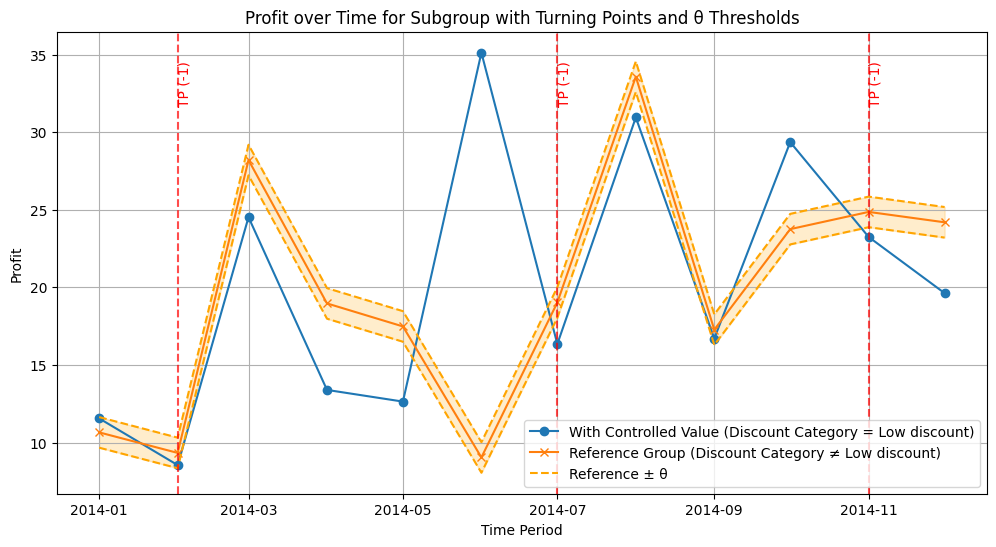

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'Order Date' is in datetime format and create 'Time Period' column
train_data['Order Date'] = pd.to_datetime(train_data['Order Date'])
train_data['Time Period'] = train_data['Order Date'].dt.to_period(time_unit)  # 'M' for months, 'W' for weeks

# Define the complete time index for consistent time periods
complete_time_index = pd.period_range(start=train_data['Time Period'].min(), end=train_data['Time Period'].max(), freq=time_unit)

# Extract the desired subgroup from the sorted DataFrame
first_row = subgroup_details_df_sorted.iloc[1]  # Adjust the index as needed
attributes = first_row['Attributes']
A_S_t = first_row['Discount Category']  # The controlled variable value
controllable_attributes = 'Discount Category'  # The controllable attribute
target_attribute = 'Profit'  # The target variable for analysis
percentage = 5  # The percentage used in the theta calculation

# Create mask matching all subgroup attributes (including controllable attribute)
mask = np.ones(len(train_data), dtype=bool)
for attr, value in attributes.items():
    mask &= (train_data[attr] == value)
data_with_controlled_value = train_data[mask]

# Reference data: data matching subgroup attributes except controllable attribute, and controllable attribute not equal to A_S_t
mask_reference = np.ones(len(train_data), dtype=bool)
for attr, value in attributes.items():
    if attr != controllable_attributes:
        mask_reference &= (train_data[attr] == value)
data_without_controlled_value = train_data[mask_reference & (train_data[controllable_attributes] != A_S_t)]

# Group the data by 'Time Period' and calculate the mean of the target attribute
grouped_with = data_with_controlled_value.groupby('Time Period')[target_attribute].mean().reindex(complete_time_index, fill_value=np.nan)
grouped_without = data_without_controlled_value.groupby('Time Period')[target_attribute].mean().reindex(complete_time_index, fill_value=np.nan)

# Calculate theta (θ) as a percentage of the overall mean of the reference group
theta = percentage / 100 * grouped_without.mean()  # Scalar value

# Calculate the upper and lower thresholds
upper_threshold = grouped_without + theta
lower_threshold = grouped_without - theta

# Extract the indicator values and turning points
indicator_values = first_row['Indicator Values']
turning_points = first_row['Turning Points']

# Create a DataFrame for indicator values
indicator_df = pd.DataFrame({
    'Time Period': complete_time_index,
    'Indicator Value': indicator_values
})
indicator_df.set_index('Time Period', inplace=True)

# Plot the target attribute over time for both datasets
plt.figure(figsize=(12, 6))
plt.plot(grouped_with.index.to_timestamp(), grouped_with.values, marker='o', label=f"With Controlled Value ({controllable_attributes} = {A_S_t})")
plt.plot(grouped_without.index.to_timestamp(), grouped_without.values, marker='x', label=f"Reference Group ({controllable_attributes} ≠ {A_S_t})")

# Plot the θ thresholds around the reference plotline
plt.plot(upper_threshold.index.to_timestamp(), upper_threshold.values, linestyle='--', color='orange', label=f'Reference ± θ')
plt.plot(lower_threshold.index.to_timestamp(), lower_threshold.values, linestyle='--', color='orange')

# Fill the area between the thresholds for visualization
plt.fill_between(upper_threshold.index.to_timestamp(), lower_threshold.values, upper_threshold.values, color='orange', alpha=0.2)

# Plot vertical lines at the turning point periods
for tp in turning_points:
    index, value = tp  # index in indicator_values
    time_period = complete_time_index[index].to_timestamp()
    # Choose color based on the turning point value
    if value == 1:
        color = 'green'  # Positive turning point
    elif value == -1:
        color = 'red'    # Negative turning point
    else:
        color = 'grey'   # Neutral
    plt.axvline(x=time_period, color=color, linestyle='--', alpha=0.7)
    # Optionally, annotate the turning point
    plt.text(time_period, plt.ylim()[1]*0.95, f'TP ({value})', rotation=90, verticalalignment='top', color=color)

plt.xlabel('Time Period')
plt.ylabel(target_attribute)
plt.title('Profit over Time for Subgroup with Turning Points and θ Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
print("Top Subgroup Details:")
print(subgroup_details_df_sorted.iloc[0])


Top Subgroup Details:
Attributes                       {'Sub-Category': 'Paper', 'Region': 'East', 'S...
Quality                                                                          4
Group Size (Unique Customers)                                                   32
Turning Points                                  [(1, 0), (6, 0), (8, -1), (10, 0)]
Indicator Values                           [-1, 0, 0, 0, 0, 1, 0, 0, -1, -1, 0, 0]
Discount Category                                                     Low discount
Name: 161, dtype: object


In [38]:
print("Sorted Subgroup Details:")
print(subgroup_details_df_sorted.head())  # Display top 5 rows


Sorted Subgroup Details:
                                            Attributes  Quality  \
161  {'Sub-Category': 'Paper', 'Region': 'East', 'S...        4   
21   {'Sub-Category': 'Paper', 'Ship Mode': 'Standa...        4   
69   {'Sub-Category': 'Tables', 'Segment': 'Consume...        4   
182  {'Sub-Category': 'Chairs', 'Segment': 'Consume...        4   
0                         {'Sub-Category': 'Machines'}        3   

     Group Size (Unique Customers)                      Turning Points  \
161                             32  [(1, 0), (6, 0), (8, -1), (10, 0)]   
21                             131   [(2, 1), (6, 1), (8, 0), (10, 1)]   
69                              12  [(3, 0), (5, 1), (8, 0), (10, -1)]   
182                             14  [(2, 0), (4, 1), (6, -1), (10, 1)]   
0                               22  [(0, 0), (6, 0), (8, -1), (10, 1)]   

                              Indicator Values Discount Category  
161    [-1, 0, 0, 0, 0, 1, 0, 0, -1, -1, 0, 0]      Low disc